<a href="https://colab.research.google.com/github/Tharun0024/Elevate_Labs_Task-6/blob/main/data6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()


In [3]:
df = pd.read_csv("Iris.csv")  # If the file name is Iris.csv
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()
df.describe()
df["Species"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [5]:
df = df.drop(columns=['Id'])


In [6]:
X = df.drop("Species", axis=1)
y = df["Species"]


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



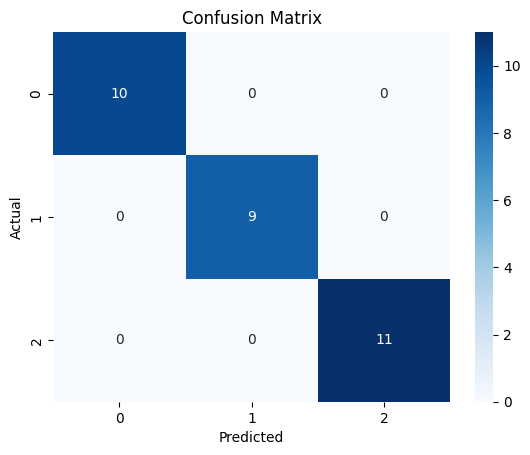

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


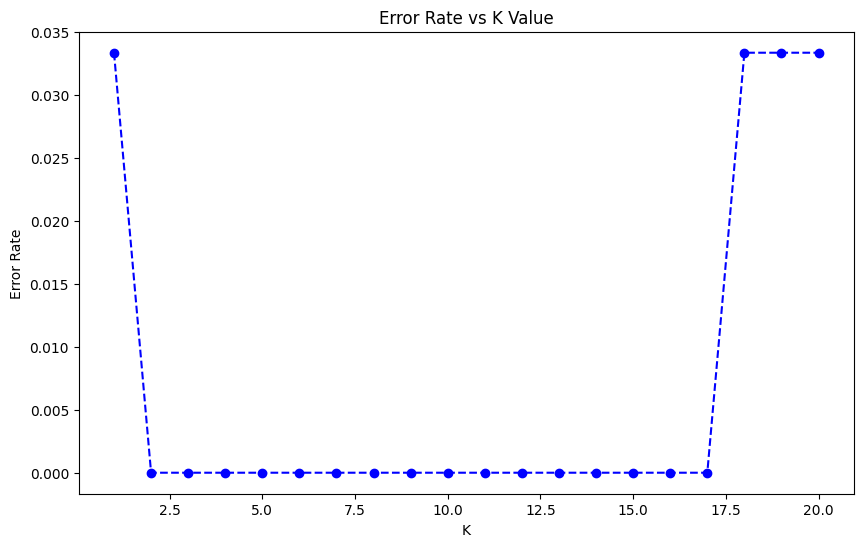

In [11]:
error_rate = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred_k = model.predict(X_test)
    error = np.mean(pred_k != y_test)
    error_rate.append(error)

plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rate, marker='o', linestyle='--', color='b')
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()


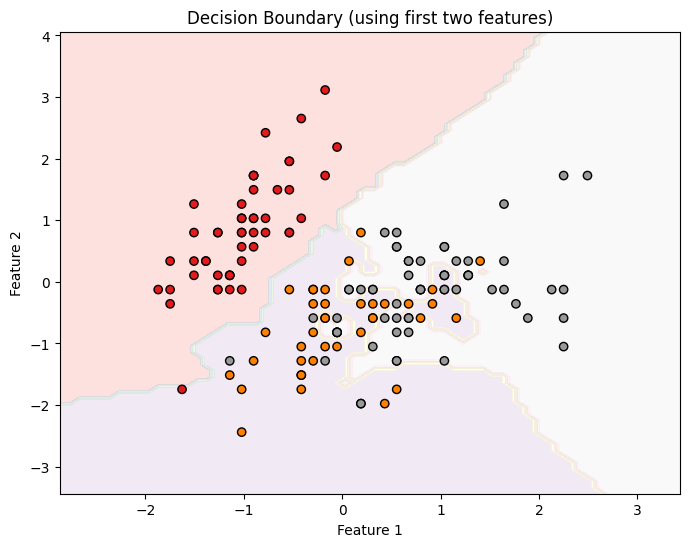

In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels to numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train using the first two features again with encoded labels
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_encoded, test_size=0.2, random_state=42)
knn_vis.fit(X_train_vis, y_train_vis)

# Predict and reshape for plotting
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Now plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Pastel1')
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_encoded, edgecolor='k', cmap='Set1')
plt.title("Decision Boundary (using first two features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
